# Used Car Price Prediction (using Linear Regression)

### __Steps involved:__
1. Loading the Packages and Datasets<br>
2. Viewing the Datasets<br>
    2.1 Viewing Top 5 rows of the Datasets<br>
    2.2 Removing 1st column of the datasets<br>
    2.3 Viewing information about the datasets<br>
3. Cleaning the Datasets<br>
    3.1 Checking for null values in the datasets<br>
    3.2 Dropping columns from Datasets that mostly have Null values<br>
    3.3 Dropping rows from the Datasets Having Null values<br>
4. Describing the Datasets<br>
5. Exploratory Data Analysis (EDA)<br>
6. Dealing with categorical data and Fitting linear Regression Model<br>
    6.1 Creating dummy variables of categorical variables<br>
    6.2 Fitting Linear Regression Model<br>
7. Feature Engineering and Re-modelling based on Feature Selection<br>
    7.1 Labelling the columns<br>
    7.2 Correlation Matrix with HeatMap<br>
    7.3 Re-modelling using selected features<br>
8.  Checking for heteroskedasticity and removing it by doing log transformation<br>
    8.1 Breusch-Pagan Test<br>
    8.2 Plotting residual vs. predictor plots<br>
    8.3 Removing heteroskedasticity by doing log transformation<br>
    8.4 Re-modelling after doing log transformation<br>
    
_Dataset Link:_ https://www.kaggle.com/avikasliwal/used-cars-price-prediction

## 1. Loading Packages And Datasets

In [1]:
# Loading the Packages
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from statsmodels.stats.diagnostic import het_breuschpagan

from sklearn.metrics import mean_squared_error

from math import sqrt

In [2]:
#Loading the Dataset
test = pd.read_csv("C:/Users/Lenovo/Dropbox/My PC (LAPTOP-T1F1GG8F)/Desktop/Mentorbruh/archive/test-data.csv")
train = pd.read_csv("C:/Users/Lenovo/Dropbox/My PC (LAPTOP-T1F1GG8F)/Desktop/Mentorbruh/archive/train-data.csv")

## 2. Viewing the datasets

#### 2.1 Viewing top 5 rows of the datasets

In [3]:
train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
test.head(10)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN
5,5,Mahindra XUV500 W8 2WD,Coimbatore,2016,85609,Diesel,Manual,Second,16.0 kmpl,2179 CC,140 bhp,7.0,NaN
6,6,Toyota Fortuner 4x2 AT TRD Sportivo,Pune,2015,59000,Diesel,Automatic,First,12.55 kmpl,2982 CC,168.7 bhp,7.0,NaN
7,7,Hyundai EON Era Plus,Jaipur,2013,65000,Petrol,Manual,First,21.1 kmpl,814 CC,55.2 bhp,5.0,NaN
8,8,Honda City 1.5 S MT,Mumbai,2011,66000,Petrol,Manual,Second,17.0 kmpl,1497 CC,118 bhp,5.0,NaN
9,9,Mahindra XUV500 W6 2WD,Coimbatore,2015,54684,Diesel,Manual,First,15.1 kmpl,2179 CC,140 bhp,7.0,NaN


#### 2.2 Removing 1st column of the datasets

In [5]:
train = train.iloc[:,1:]

In [6]:
test = test.iloc[:,1:]

#### 2.3 Viewing some information about the datasets

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   object 
 8   Engine             1224 non-null   object 
 9   Power              1224 non-null   object 
 10  Seats              1223 non-null   float64
 11  New_Price          182 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 115.8+ KB


## 3. Cleaning the Dataset

#### 3.1 Checking for null values in the datasets

In [9]:
print(train.isnull().sum())

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64


In [10]:
print(test.isnull().sum())

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64


#### 3.2 Dropping column new price from train and test datasets as it has mostly null values

In [11]:
train.drop('New_Price', inplace = True, axis = 1)

In [12]:
train.head(15)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,5.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,1.95


In [13]:
test.drop('New_Price' ,inplace = True, axis= 1)

In [14]:
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


#### 3.1 Dropping rows having null values

In [15]:
#Checking for nan or null values
def check_na():
    print('Training set nulls\n-----------')
    for c in train.columns:
        print(c, round(float(train[c].isna().sum())/len(train[c]),4)*100,'%')
    print('\nTesting set nulls\n-----------')
    for c in test.columns:
        print(c,round(float(test[c].isna().sum())/len(test[c]),4)*100,'%')

In [16]:
check_na()

Training set nulls
-----------
Name 0.0 %
Location 0.0 %
Year 0.0 %
Kilometers_Driven 0.0 %
Fuel_Type 0.0 %
Transmission 0.0 %
Owner_Type 0.0 %
Mileage 0.03 %
Engine 0.6 %
Power 0.6 %
Seats 0.7000000000000001 %
Price 0.0 %

Testing set nulls
-----------
Name 0.0 %
Location 0.0 %
Year 0.0 %
Kilometers_Driven 0.0 %
Fuel_Type 0.0 %
Transmission 0.0 %
Owner_Type 0.0 %
Mileage 0.0 %
Engine 0.8099999999999999 %
Power 0.8099999999999999 %
Seats 0.89 %


In [17]:
#Drop anything that ended with up with nan
train.dropna(subset=['Mileage','Engine','Power','Seats'],inplace=True)
test.dropna(subset=['Mileage','Engine','Power','Seats'],inplace=True)

In [18]:
#Removing units from mileage,engine and power as they are continous but detected as categorical variable
string_vals = ['Power','Engine','Mileage']
#Splitting the strings and removing the units
for col in string_vals:
    train[col]=pd.to_numeric(train[col].str.split().str.get(0),errors ='coerce')
    test[col]=pd.to_numeric(test[col].str.split().str.get(0),errors = 'coerce')

In [19]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74


## 4. Describing the datasets

In [20]:
train.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5975.000000,5.975000e+03,5975.000000,5975.000000,5872.000000,5975.000000,5975.000000
mean,2013.386778,5.867431e+04,18.179408,1621.606695,113.276894,5.278828,9.501647
std,3.247238,9.155851e+04,4.521801,601.036987,53.881892,0.808959,11.205736
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,0.000000,0.440000
25%,2012.000000,3.390800e+04,15.200000,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.160000,1493.000000,97.700000,5.000000,5.650000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [21]:
test.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
count,1223.000000,1223.000000,1223.000000,1223.000000,1201.000000,1223.000000
mean,2013.412101,58423.957482,18.208005,1593.907604,110.398472,5.284546
std,3.177548,35565.435199,4.418167,564.465646,51.561489,0.825622
min,1996.000000,1000.000000,0.000000,624.000000,34.200000,2.000000
25%,2011.000000,34000.000000,15.260000,1198.000000,75.000000,5.000000
50%,2014.000000,54407.000000,18.300000,1461.000000,93.700000,5.000000
75%,2016.000000,75000.000000,21.100000,1968.000000,130.000000,5.000000
max,2019.000000,350000.000000,32.260000,5998.000000,616.000000,10.000000


## 5. Exploratory Data Analysis

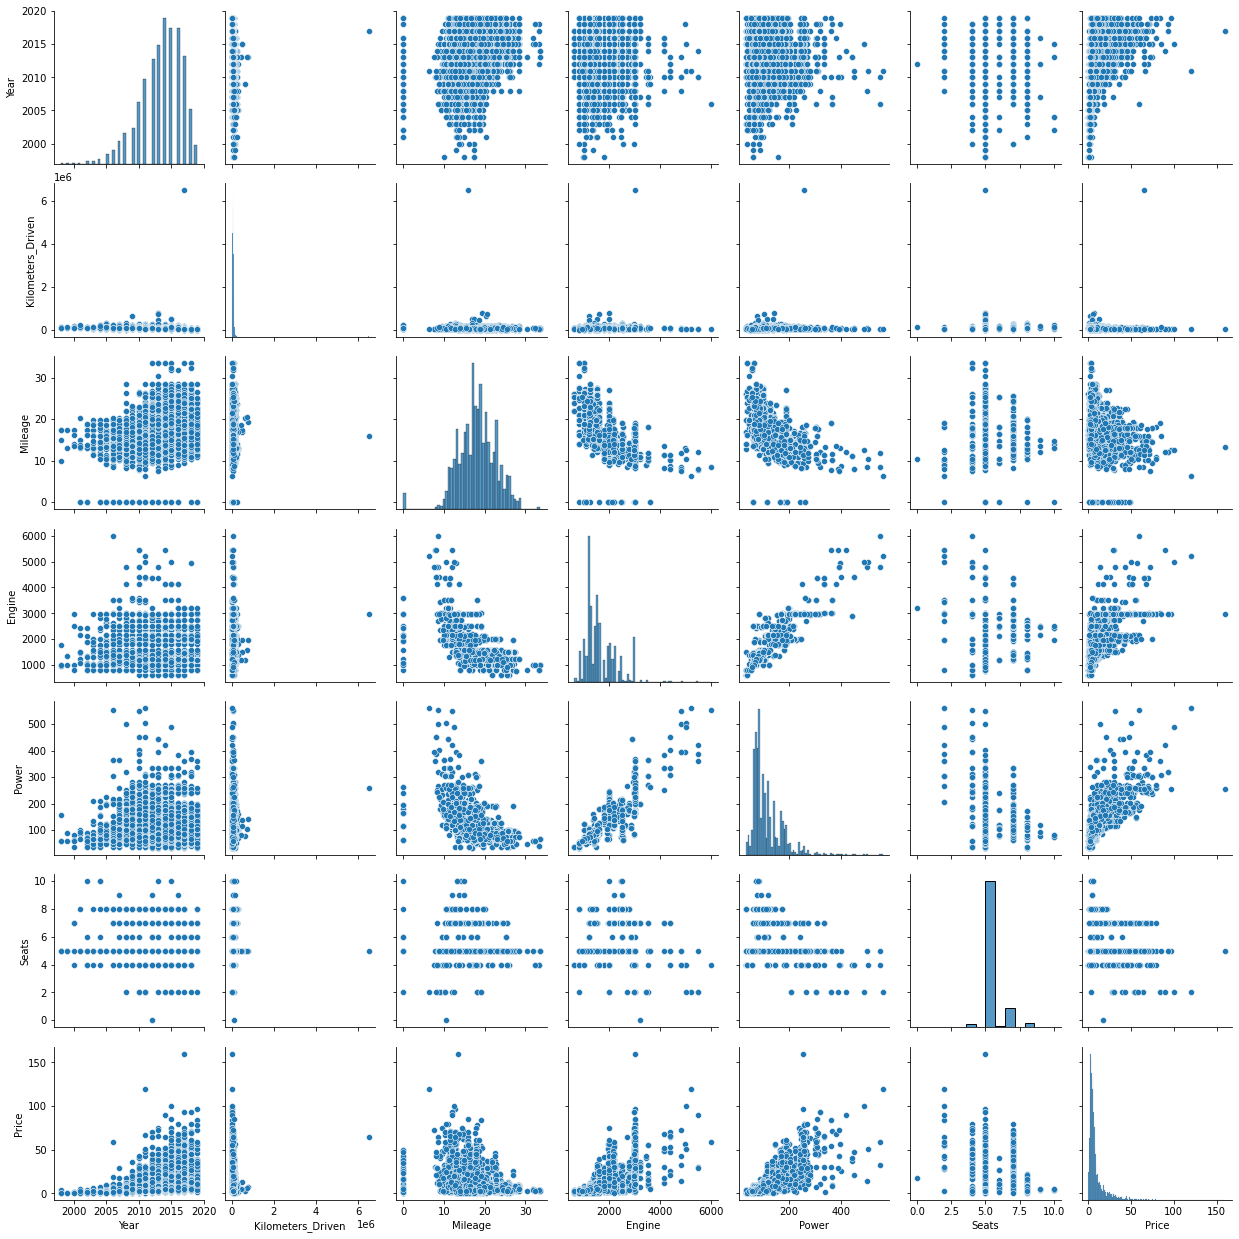

In [22]:
#Cheking pair-plot
sns.pairplot(train)

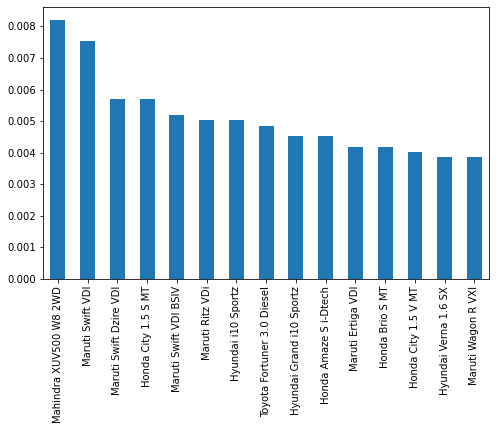

In [23]:
#Plotting count of top 15 Cars
plt.figure(figsize=(8,5))
train.Name.value_counts(normalize= True , sort= True).nlargest(15).plot.bar()
plt.show()

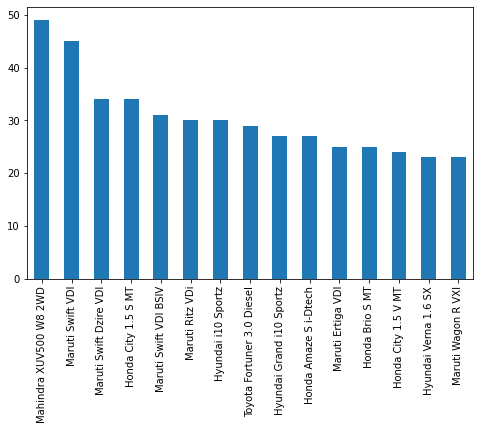

In [24]:
#Plotting count of top 15 Cars
plt.figure(figsize=(8,5))
train.Name.value_counts(sort= True).nlargest(15).plot.bar()
plt.show()

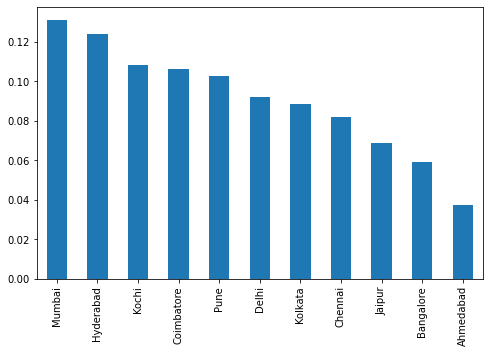

In [25]:
#Plotting percentage of cars location-Wise
plt.figure(figsize=(8,5))
train.Location.value_counts(normalize= True, sort = True).plot.bar()
plt.show()

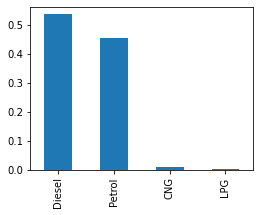

In [26]:
#Plotting percent of cars Fuel_Type-Wise
plt.figure(figsize=(4,3))
train.Fuel_Type.value_counts(normalize = True, sort = True).plot.bar()
plt.show()

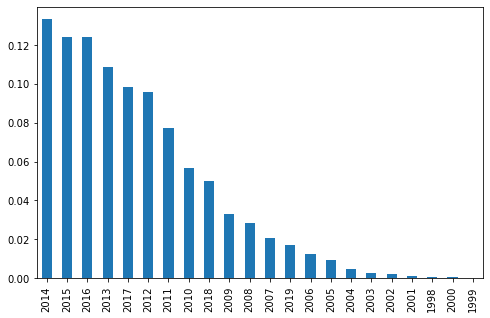

In [27]:
##Plotting percent of cars Year-Wise
plt.figure(figsize=(8,5))
train.Year.value_counts(normalize= True).plot.bar()
plt.show()

## 6. Dealing with categorical data and Fitting linear Regression Model

#### 6.1 Creating dummy variables of categorical variables

In [28]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74


In [29]:
#Making list Of catgorical features
X= train[['Name','Location','Fuel_Type','Transmission','Owner_Type']]

In [30]:
#Creating dummy variables
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,Name_Audi A3 35 TDI Attraction,Name_Audi A3 35 TDI Premium,Name_Audi A3 35 TDI Premium Plus,Name_Audi A3 35 TDI Technology,Name_Audi A4 1.8 TFSI,Name_Audi A4 1.8 TFSI Technology Edition,Name_Audi A4 2.0 TDI,Name_Audi A4 2.0 TDI 177 Bhp Premium Plus,Name_Audi A4 2.0 TDI 177 Bhp Technology Edition,Name_Audi A4 2.0 TDI Celebration Edition,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


#### 6.2 Fitting the linear Regression Model

In [31]:
Y = train['Price']

In [32]:
# Train-Test Split 
# Checking the shape of splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3585, 1871)
(2390, 1871)
(3585,)
(2390,)


In [33]:
#importing and calling Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [34]:
# print the intercept
print(model.intercept_)

1322510729050.5647


In [35]:
#Checking the coefficient
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Name_Audi A3 35 TDI Attraction,-3.884428e+07
Name_Audi A3 35 TDI Premium,-3.884428e+07
Name_Audi A3 35 TDI Premium Plus,6.102677e+12
Name_Audi A3 35 TDI Technology,-3.884427e+07
Name_Audi A4 1.8 TFSI,-3.884430e+07
...,...
Fuel_Type_Petrol,-1.322472e+12
Transmission_Manual,4.847405e+12
Owner_Type_Fourth & Above,-3.134354e+00
Owner_Type_Second,-1.345703e+00


In [36]:
predictions = model.predict(X_test)
predictions

array([ 4.97949219e+00,  3.38330078e+00,  2.27197266e+00, ...,
        3.16577148e+00, -3.74052894e+13,  6.04833984e+00])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

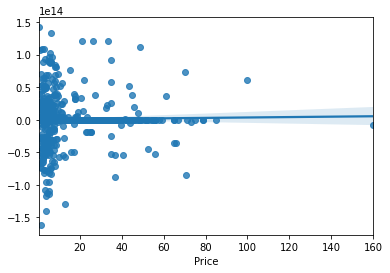

In [37]:
#Plotting the regression 
sns.regplot(y_test,predictions)

In [38]:
#Checking Model Performance
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     35.36
Date:                Thu, 12 Aug 2021   Prob (F-statistic):               0.00
Time:                        03:45:47   Log-Likelihood:                -7955.9
No. Observations:                3585   AIC:                         1.887e+04
Df Residuals:                    2104   BIC:                         2.803e+04
Df Model:                        1480                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [39]:
### Checking RMSE for the fitted Model
mse = mean_squared_error(y_test, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 18187048784287.523438


## 7. Feature Engineering and Re-modelling based on Feature Selection

### 7.1 Labelling the columns

In [40]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74


#### 7.1.1 Labelling Column Name

In [41]:
train.Name.unique()

array(['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option',
       'Honda Jazz V', ..., 'Volkswagen Polo IPL II 1.2 Petrol Highline',
       'Tata Bolt Revotron XT', 'Mahindra Xylo D4 BSIV'], dtype=object)

In [42]:
namemapping = {label:idx+1 for idx, label in enumerate(np.unique(train['Name']))}
namemapping.update({"Not Applicable": 0})
invnamemapping = {v : x for x, v in namemapping.items()}
train['Name'] = train['Name'].map(namemapping).astype(float)
train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1182.0,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75
1,505.0,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50
2,479.0,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50
3,1046.0,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,24.0,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,1141.0,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,74.00,5.0,4.75
6015,658.0,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,71.00,5.0,4.00
6016,919.0,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,112.00,8.0,2.90
6017,1189.0,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,67.10,5.0,2.65


#### 7.1.2 Labelling Column Location

In [43]:
train.Location.unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [44]:
locationmapping = {label:idx+1 for idx, label in enumerate(np.unique(train['Location']))}
locationmapping.update({"null": 0})
invlocationmapping = {v : x for x, v in locationmapping.items()}
train['Location'] = train['Location'].map(locationmapping).astype(float)
train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1182.0,10.0,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75
1,505.0,11.0,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50
2,479.0,3.0,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50
3,1046.0,3.0,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,24.0,4.0,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,1141.0,5.0,2014,27365,Diesel,Manual,First,28.40,1248,74.00,5.0,4.75
6015,658.0,7.0,2015,100000,Diesel,Manual,First,24.40,1120,71.00,5.0,4.00
6016,919.0,7.0,2012,55000,Diesel,Manual,Second,14.00,2498,112.00,8.0,2.90
6017,1189.0,9.0,2013,46000,Petrol,Manual,First,18.90,998,67.10,5.0,2.65


#### 7.1.3 Labelling Column Fuel_Type

In [45]:
train.Fuel_Type.unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

In [46]:
fuelmapping = {label:idx+1 for idx, label in enumerate(np.unique(train['Fuel_Type']))}
fuelmapping.update({"null": 0})
invfuelmapping = {v : x for x, v in fuelmapping.items()}
train['Fuel_Type'] = train['Fuel_Type'].map(fuelmapping).astype(float)
train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1182.0,10.0,2010,72000,1.0,Manual,First,26.60,998,58.16,5.0,1.75
1,505.0,11.0,2015,41000,2.0,Manual,First,19.67,1582,126.20,5.0,12.50
2,479.0,3.0,2011,46000,4.0,Manual,First,18.20,1199,88.70,5.0,4.50
3,1046.0,3.0,2012,87000,2.0,Manual,First,20.77,1248,88.76,7.0,6.00
4,24.0,4.0,2013,40670,2.0,Automatic,Second,15.20,1968,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,1141.0,5.0,2014,27365,2.0,Manual,First,28.40,1248,74.00,5.0,4.75
6015,658.0,7.0,2015,100000,2.0,Manual,First,24.40,1120,71.00,5.0,4.00
6016,919.0,7.0,2012,55000,2.0,Manual,Second,14.00,2498,112.00,8.0,2.90
6017,1189.0,9.0,2013,46000,4.0,Manual,First,18.90,998,67.10,5.0,2.65


#### 7.1.4 Labelling Column Transmission

In [47]:
train.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [48]:
transmapping = {label:idx+1 for idx, label in enumerate(np.unique(train['Transmission']))}
transmapping.update({"null": 0})
invtransmapping = {v : x for x, v in transmapping.items()}
train['Transmission'] = train['Transmission'].map(transmapping).astype(float)
train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1182.0,10.0,2010,72000,1.0,2.0,First,26.60,998,58.16,5.0,1.75
1,505.0,11.0,2015,41000,2.0,2.0,First,19.67,1582,126.20,5.0,12.50
2,479.0,3.0,2011,46000,4.0,2.0,First,18.20,1199,88.70,5.0,4.50
3,1046.0,3.0,2012,87000,2.0,2.0,First,20.77,1248,88.76,7.0,6.00
4,24.0,4.0,2013,40670,2.0,1.0,Second,15.20,1968,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,1141.0,5.0,2014,27365,2.0,2.0,First,28.40,1248,74.00,5.0,4.75
6015,658.0,7.0,2015,100000,2.0,2.0,First,24.40,1120,71.00,5.0,4.00
6016,919.0,7.0,2012,55000,2.0,2.0,Second,14.00,2498,112.00,8.0,2.90
6017,1189.0,9.0,2013,46000,4.0,2.0,First,18.90,998,67.10,5.0,2.65


#### 7.1.5 Labelling Column Owner_Type

In [49]:
train.Owner_Type.unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [50]:
ownTmapping = {label:idx+1 for idx, label in enumerate(np.unique(train['Owner_Type']))}
ownTmapping.update({"null": 0 })
invownTmapping = {v : x for x, v in ownTmapping.items()}
train['Owner_Type'] = train['Owner_Type'].map(ownTmapping).astype(float)
train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1182.0,10.0,2010,72000,1.0,2.0,1.0,26.60,998,58.16,5.0,1.75
1,505.0,11.0,2015,41000,2.0,2.0,1.0,19.67,1582,126.20,5.0,12.50
2,479.0,3.0,2011,46000,4.0,2.0,1.0,18.20,1199,88.70,5.0,4.50
3,1046.0,3.0,2012,87000,2.0,2.0,1.0,20.77,1248,88.76,7.0,6.00
4,24.0,4.0,2013,40670,2.0,1.0,3.0,15.20,1968,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,1141.0,5.0,2014,27365,2.0,2.0,1.0,28.40,1248,74.00,5.0,4.75
6015,658.0,7.0,2015,100000,2.0,2.0,1.0,24.40,1120,71.00,5.0,4.00
6016,919.0,7.0,2012,55000,2.0,2.0,3.0,14.00,2498,112.00,8.0,2.90
6017,1189.0,9.0,2013,46000,4.0,2.0,1.0,18.90,998,67.10,5.0,2.65


In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   float64
 1   Location           5975 non-null   float64
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   float64
 5   Transmission       5975 non-null   float64
 6   Owner_Type         5975 non-null   float64
 7   Mileage            5975 non-null   float64
 8   Engine             5975 non-null   int64  
 9   Power              5872 non-null   float64
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(9), int64(3)
memory usage: 606.8 KB


#### 7.1.6 Labelling column year and drivemapping

In [52]:
yearmapping = {label:idx+1 for idx, label in enumerate(np.unique(train['Year']))}
yearmapping.update({0: 0})
invyearmapping = {v : x for x, v in yearmapping.items()}
train['Year'] = train['Year'].map(yearmapping).astype(float)
train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1182.0,10.0,13.0,72000,1.0,2.0,1.0,26.60,998,58.16,5.0,1.75
1,505.0,11.0,18.0,41000,2.0,2.0,1.0,19.67,1582,126.20,5.0,12.50
2,479.0,3.0,14.0,46000,4.0,2.0,1.0,18.20,1199,88.70,5.0,4.50
3,1046.0,3.0,15.0,87000,2.0,2.0,1.0,20.77,1248,88.76,7.0,6.00
4,24.0,4.0,16.0,40670,2.0,1.0,3.0,15.20,1968,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,1141.0,5.0,17.0,27365,2.0,2.0,1.0,28.40,1248,74.00,5.0,4.75
6015,658.0,7.0,18.0,100000,2.0,2.0,1.0,24.40,1120,71.00,5.0,4.00
6016,919.0,7.0,15.0,55000,2.0,2.0,3.0,14.00,2498,112.00,8.0,2.90
6017,1189.0,9.0,16.0,46000,4.0,2.0,1.0,18.90,998,67.10,5.0,2.65


In [53]:
drivenmapping = {label:idx+1 for idx, label in enumerate(np.unique(train['Kilometers_Driven']))}
drivenmapping.update({0: 0})
invdrivenmapping = {v : x for x, v in drivenmapping.items()}
train['Kilometers_Driven'] = train['Kilometers_Driven'].map(drivenmapping).astype(float)
train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1182.0,10.0,13.0,2351.0,1.0,2.0,1.0,26.60,998,58.16,5.0,1.75
1,505.0,11.0,18.0,1126.0,2.0,2.0,1.0,19.67,1582,126.20,5.0,12.50
2,479.0,3.0,14.0,1352.0,4.0,2.0,1.0,18.20,1199,88.70,5.0,4.50
3,1046.0,3.0,15.0,2682.0,2.0,2.0,1.0,20.77,1248,88.76,7.0,6.00
4,24.0,4.0,16.0,1118.0,2.0,1.0,3.0,15.20,1968,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,1141.0,5.0,17.0,595.0,2.0,2.0,1.0,28.40,1248,74.00,5.0,4.75
6015,658.0,7.0,18.0,2816.0,2.0,2.0,1.0,24.40,1120,71.00,5.0,4.00
6016,919.0,7.0,15.0,1703.0,2.0,2.0,3.0,14.00,2498,112.00,8.0,2.90
6017,1189.0,9.0,16.0,1352.0,4.0,2.0,1.0,18.90,998,67.10,5.0,2.65


#### 7.1.7 Changing datatype of all columns to float64 

In [54]:
# Changing the datatype of Engine
train['Engine']= train['Engine'].astype('float')

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   float64
 1   Location           5975 non-null   float64
 2   Year               5975 non-null   float64
 3   Kilometers_Driven  5975 non-null   float64
 4   Fuel_Type          5975 non-null   float64
 5   Transmission       5975 non-null   float64
 6   Owner_Type         5975 non-null   float64
 7   Mileage            5975 non-null   float64
 8   Engine             5975 non-null   float64
 9   Power              5872 non-null   float64
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(12)
memory usage: 606.8 KB


In [56]:
check_na()

Training set nulls
-----------
Name 0.0 %
Location 0.0 %
Year 0.0 %
Kilometers_Driven 0.0 %
Fuel_Type 0.0 %
Transmission 0.0 %
Owner_Type 0.0 %
Mileage 0.0 %
Engine 0.0 %
Power 1.72 %
Seats 0.0 %
Price 0.0 %

Testing set nulls
-----------
Name 0.0 %
Location 0.0 %
Year 0.0 %
Kilometers_Driven 0.0 %
Fuel_Type 0.0 %
Transmission 0.0 %
Owner_Type 0.0 %
Mileage 0.0 %
Engine 0.0 %
Power 1.7999999999999998 %
Seats 0.0 %


In [57]:
#Drop anything that ended with up with nan
train.dropna(subset=['Mileage','Engine','Power','Seats'],inplace=True)
test.dropna(subset=['Mileage','Engine','Power','Seats'],inplace=True)

### 7.2 Correlation Matrix with HeatMap

<AxesSubplot:title={'center':'Heat Map'}>

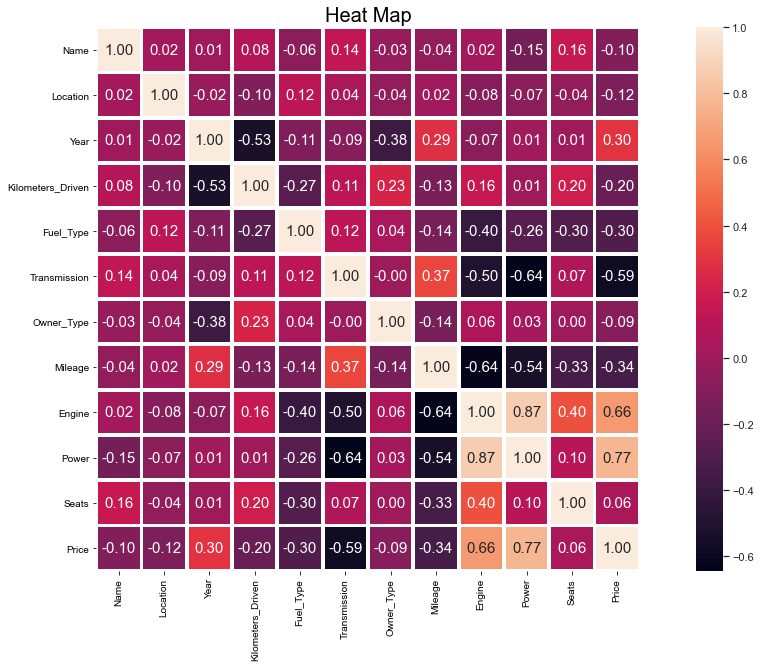

In [58]:
### Creating heatmap to find the correlation b/w dependent and independent values
cols=[ 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats','Price']
plt.figure(figsize=(20,10))
plt.title('Heat Map', fontsize=20)
sns.set(font_scale=1.0)
sns.heatmap(train.corr(), cbar=True, annot =True, square=True, fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols, linewidth=3)

``` As, we can see from the above plot that Price is highly correlated to Power with 77% then Engine with 66% and then year with 30%```<br>
``` So, we'll take Power,Engine and Year as Independent Varibles with Price as Dependent Variable```

#### 7.3 Re-modelling using selected features

In [59]:
X= train[['Power','Engine','Year']]

In [60]:
Y = train['Price']

In [61]:
# Train-Test Split 
# Checking the shape of splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3523, 3)
(2349, 3)
(3523,)
(2349,)


In [62]:
#importing and calling Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [63]:
# print the intercept
print(model.intercept_)

-25.598125593879992


In [64]:
#Checking the coefficient
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Power,0.162268
Engine,0.000066
Year,1.019752


In [65]:
predictions = model.predict(X_test)
predictions

array([15.37906414, 19.64040158, -2.66216378, ..., 23.71761954,
        2.69139619,  9.66036285])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

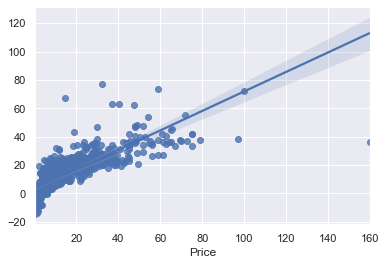

In [66]:
#Plotting the regression 
sns.regplot(y_test,predictions)

In [67]:
#Checking Model Performance
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     2613.
Date:                Thu, 12 Aug 2021   Prob (F-statistic):               0.00
Time:                        03:45:50   Log-Likelihood:                -11469.
No. Observations:                3523   AIC:                         2.295e+04
Df Residuals:                    3519   BIC:                         2.297e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.5981      0.658    -38.918      0.0

``` As, we can see that it has strong multicollinearity that means we may get an even better result removing one.```<br>
```From domain understanding, we can say that either removing engine or power can make our model even better.```

In [68]:
### Checking Root Mean SQUARE for the Fitted Model
mse = mean_squared_error(y_test, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 6.487446


## 8. Checking for heteroskedasticity and removing it by doing log transformation

#### 8.1 Breusch-Pagan Test 

In [69]:
bp_test = het_breuschpagan(ls.resid,ls.model.exog)

In [70]:
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 847.2444928214218, 'LM-Test p-value': 2.452743328464779e-183, 'F-Statistic': 371.415769270881, 'F-Test p-value': 1.463435625320327e-209}


#### 8.2 Plotting residual vs. predictor plots

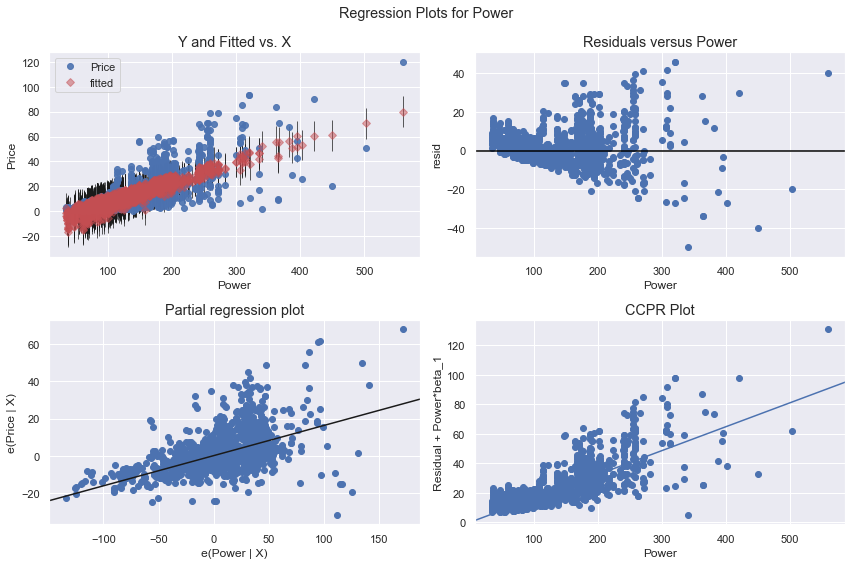

In [71]:
#create residual vs. predictor plot for 'Power'
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(ls, 'Power', fig=fig)

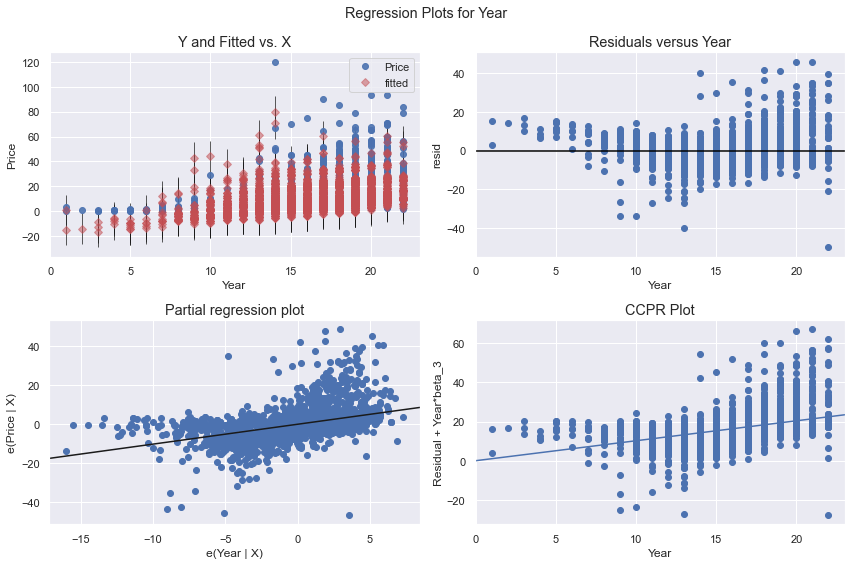

In [72]:
#create residual vs. predictor plot for 'assists'
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(ls, 'Year', fig=fig)

#### 8.3 REMOVING HETEROSCEDASITY by doing log transformation

``` As, we detected strong multicollinerity in point 7 so we'll take only Power and Year as independent variables now.```

In [73]:
# Log transformation of Price
train['Price'] = np.log(train['Price'])
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1182.0,10.0,13.0,2351.0,1.0,2.0,1.0,26.60,998.0,58.16,5.0,0.559616
1,505.0,11.0,18.0,1126.0,2.0,2.0,1.0,19.67,1582.0,126.20,5.0,2.525729
2,479.0,3.0,14.0,1352.0,4.0,2.0,1.0,18.20,1199.0,88.70,5.0,1.504077
3,1046.0,3.0,15.0,2682.0,2.0,2.0,1.0,20.77,1248.0,88.76,7.0,1.791759
4,24.0,4.0,16.0,1118.0,2.0,1.0,3.0,15.20,1968.0,140.80,5.0,2.875822


In [74]:
# Log transformation of Power
train['Power'] = np.log(train['Power'])
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1182.0,10.0,13.0,2351.0,1.0,2.0,1.0,26.60,998.0,4.063198,5.0,0.559616
1,505.0,11.0,18.0,1126.0,2.0,2.0,1.0,19.67,1582.0,4.837868,5.0,2.525729
2,479.0,3.0,14.0,1352.0,4.0,2.0,1.0,18.20,1199.0,4.485260,5.0,1.504077
3,1046.0,3.0,15.0,2682.0,2.0,2.0,1.0,20.77,1248.0,4.485936,7.0,1.791759
4,24.0,4.0,16.0,1118.0,2.0,1.0,3.0,15.20,1968.0,4.947340,5.0,2.875822


In [75]:
# Log transformation of Year
train['Year'] = np.log(train['Year'])
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1182.0,10.0,2.564949,2351.0,1.0,2.0,1.0,26.60,998.0,4.063198,5.0,0.559616
1,505.0,11.0,2.890372,1126.0,2.0,2.0,1.0,19.67,1582.0,4.837868,5.0,2.525729
2,479.0,3.0,2.639057,1352.0,4.0,2.0,1.0,18.20,1199.0,4.485260,5.0,1.504077
3,1046.0,3.0,2.708050,2682.0,2.0,2.0,1.0,20.77,1248.0,4.485936,7.0,1.791759
4,24.0,4.0,2.772589,1118.0,2.0,1.0,3.0,15.20,1968.0,4.947340,5.0,2.875822


#### 8.4 Re-modelling after doing log - transformation

In [76]:
X= train[['Power','Year']]

In [77]:
Y = train['Price']

In [78]:
# Train-Test Split 
# Checking the shape of splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3523, 2)
(2349, 2)
(3523,)
(2349,)


In [79]:
#importing and calling Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [80]:
# print the intercept
print(model.intercept_)

-10.052057830849623


In [81]:
#Checking the coefficient
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Power,1.603629
Year,1.604891


In [82]:
predictions = model.predict(X_test)
predictions

array([2.51391368, 2.5976241 , 0.54415587, ..., 3.06091597, 1.24010157,
       2.02713753])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

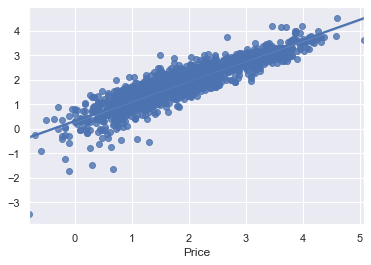

In [83]:
#Plotting the regression 
sns.regplot(y_test,predictions)

In [84]:
#Checking Model Performance
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     7694.
Date:                Thu, 12 Aug 2021   Prob (F-statistic):               0.00
Time:                        03:45:52   Log-Likelihood:                -1576.2
No. Observations:                3523   AIC:                             3158.
Df Residuals:                    3520   BIC:                             3177.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.0521      0.100   -100.551      0.0

In [85]:
### Checking RMSE for the fitted Model
mse = mean_squared_error(y_test, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 0.361037


#### CONCLUSION
```From the analysis we can conclude that Year and Power can detect Price significantly with 81% R-Square. ```